In [97]:
#import evverything needed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

## Limb Angles

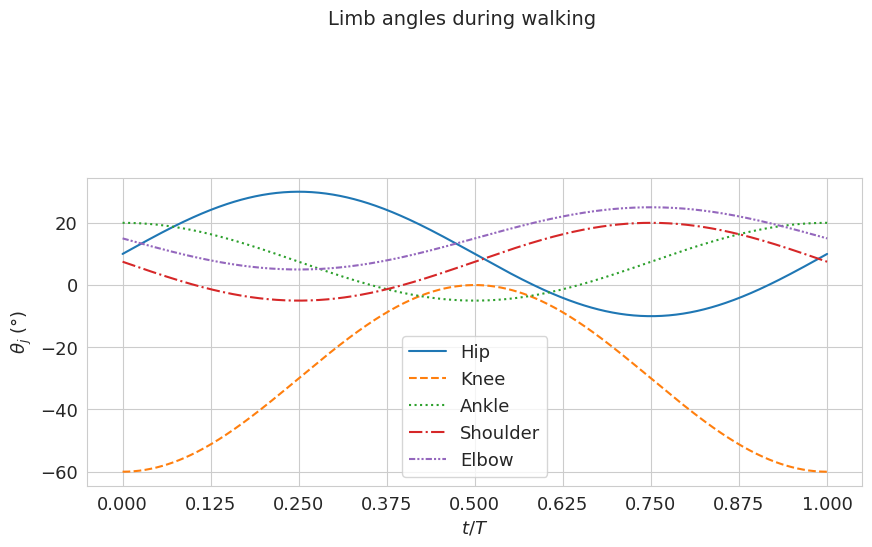

In [98]:
# Define the range of x values (one period typically from 0 to 2π)
x = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 4))

# Plot each function
sns.set_style('whitegrid')
plt.plot(x, 10 + 20*np.sin(np.pi*2*x), label='Hip')
plt.plot(x, -30 - 30*np.cos(np.pi*2*x), label='Knee', linestyle='dashed')
plt.plot(x, 7.5 + 12.5*np.cos(np.pi*2*x), label='Ankle', linestyle='dotted')
plt.plot(x, 7.5 + -12.5*np.sin(np.pi*2*x), label='Shoulder', linestyle='dashdot')
plt.plot(x, 15 + -10*np.sin(np.pi*2*x), label='Elbow', linestyle=(0, (3, 1, 1, 1, 1, 1)))

# Customizing the plot
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.125))
plt.xlabel(r'$t/T$')
plt.ylabel(r'$\theta_j$ (°)')
plt.legend()

# Place the title 
plt.figtext(0.5, 1.3, 'Limb angles during walking', ha='center', va='top', fontsize=14)


# Save the plot to a file
plt.savefig('walking_limb_angles.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

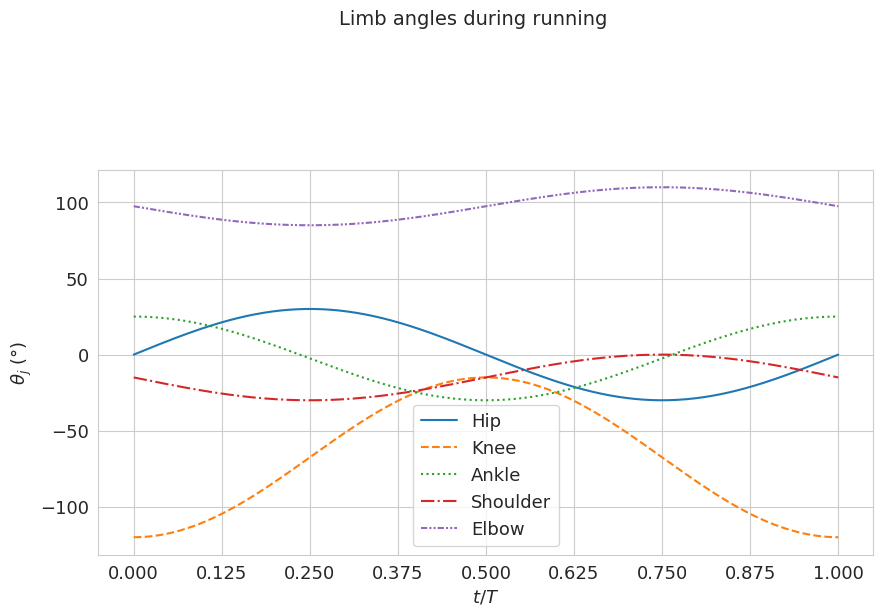

In [99]:
# Define the range of x values (one period typically from 0 to 2π)
x = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 5))

# Plot each function
plt.plot(x, 0 + 30*np.sin(np.pi*2*x), label='Hip')
plt.plot(x, -67.5 - 52.5*np.cos(np.pi*2*x), label='Knee', linestyle='dashed')
plt.plot(x, -2.5 + 27.5*np.cos(np.pi*2*x), label='Ankle', linestyle='dotted')
plt.plot(x, -15 - 15*np.sin(np.pi*2*x), label='Shoulder', linestyle='dashdot')
plt.plot(x, 97.5 - 12.5*np.sin(np.pi*2*x), label='Elbow', linestyle=(0, (3, 1, 1, 1, 1, 1)))

# Customizing the plot
sns.set_style('whitegrid')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.125))
plt.xlabel(r'$t/T$')
plt.ylabel(r'$\theta_j$ (°)')
plt.legend()

# Place the title below the graph
plt.figtext(0.5, 1.2, 'Limb angles during running', ha='center', va='top', fontsize=14)


# Save the plot to a file
plt.savefig('running_limb_angles.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## Code Validation

### Sphere

/tmp/ipykernel_7324/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


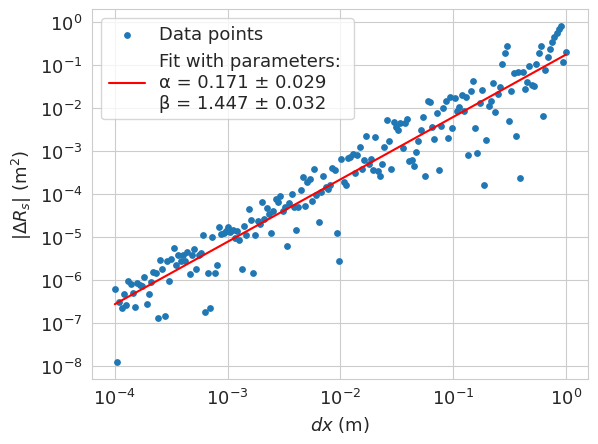

In [100]:
def anal_s(v, bodyvel, rad):
    surface = np.pi * rad ** 2
    return np.linalg.norm(v) * surface / bodyvel

def max_s(rad):
    return np.pi * rad ** 2

vrain = np.array( [0.5, 0.25, -1.])
bodyvel = 2.
v = vrain - np.array([bodyvel, 0., 0,])
rad = 0.5


# Read the data from the file
df = pd.read_csv('../data/Sphere/ErrorS.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Transform the data
df['error'] = np.abs(df['num'] - anal_s( v, bodyvel, rad))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])

# Function to model (log-log power law)
def log_power_law(x, a, b):
    return np.log(a) +  b*x

# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 13})

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_s|$ (m$^2$)') 

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/sphere_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_7324/2056084097.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


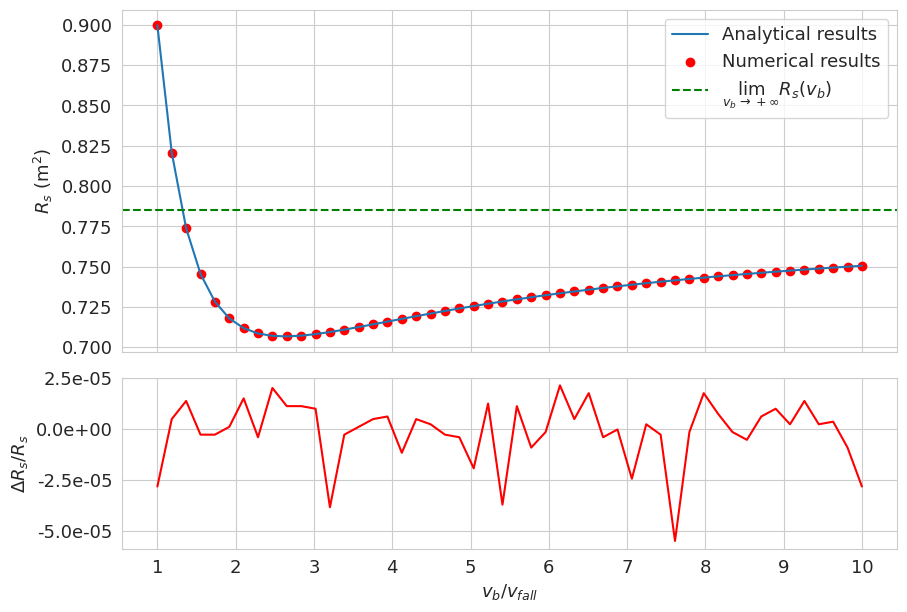

In [101]:
# Read the data from the file
with open("../data/Sphere/CompareS.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Calculate the difference between Y1 and Y2
difference = [(y2 - y1) / y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.1)  # Reduced spacing

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the x-axis with ax1

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytical results')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_s(rad), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green', linestyle='dashed')  
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylabel(r'$R_s$ (m$^2$)')
ax1.grid(True)
ax1.legend()


# Custom formatter function for scientific notation
def scientific_formatter(x, pos):
    return f'{x:.1e}'

# Apply the custom formatter to the y-axes
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))


# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b/v_{fall}$')
ax2.set_ylabel(r'$\Delta R_s/R_s$')
ax2.grid(True)

# Hide x-labels and tick labels for top plots and y-tick labels for right plots
plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/sphere_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Parallelepiped

/tmp/ipykernel_7324/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


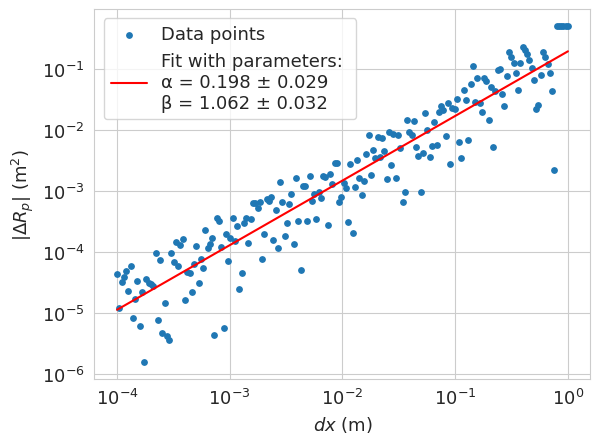

In [102]:
def anal_p(v, bodyvel, side):
    flux = 0
    flux += np.abs(np.dot(np.cross(side[0], side[1]), v))
    flux += np.abs(np.dot(np.cross(side[1], side[2]), v))
    flux += np.abs(np.dot(np.cross(side[2], side[0]), v))
    return flux/bodyvel

def max_p(side):
    flux = 0
    flux += np.abs(np.dot(np.cross(side[0], side[1]), [1,0,0]))
    flux += np.abs(np.dot(np.cross(side[1], side[2]), [1,0,0]))
    flux += np.abs(np.dot(np.cross(side[2], side[0]), [1,0,0]))
    return flux


side = [np.array([0.4, 0.0, 0.0]), np.array([0.0, 0.6, 0.0]), np.array([0.0, 0.0, 0.8])]

# Read the data from the file
df = pd.read_csv('../data/Pippo/ErrorP.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Transform the data
df['error'] = np.abs(df['num'] - anal_p(v, bodyvel, side))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])

# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_p|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/pippo_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_7324/328526613.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


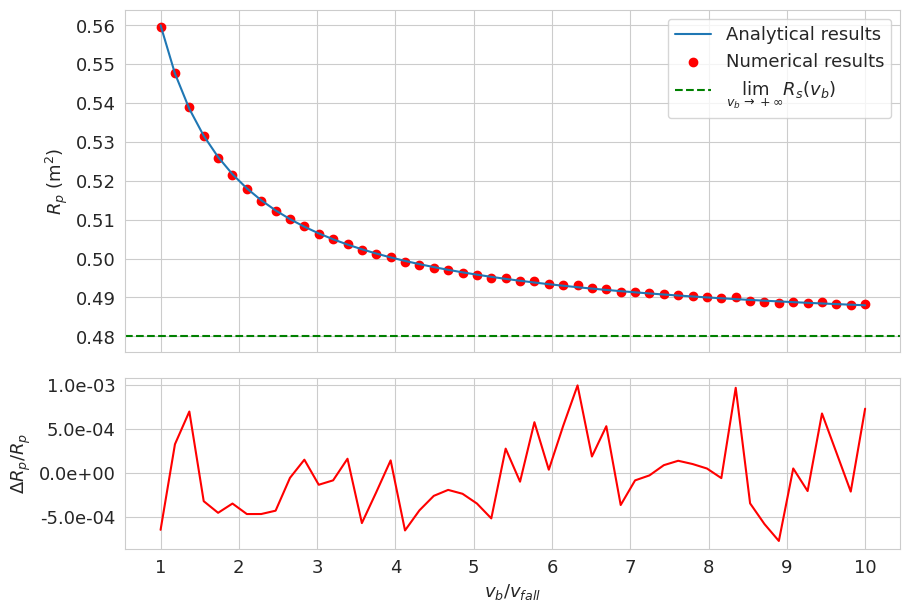

In [103]:
# Read the data from the file
with open("../data/Pippo/CompareP.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Calculate the difference between Y1 and Y2
difference = [(y2 - y1) / y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.1)  # Reduced spacing

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the x-axis with ax1

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytical results')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_p(side), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green', linestyle='dashed') 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylabel(r'$R_p$ (m$^2$)')
ax1.grid(True)
ax1.legend()



# Apply the custom formatter to the y-axes
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))


# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b/v_{fall}$')
ax2.set_ylabel(r'$\Delta R_p/R_p$')
ax2.grid(True)

# Hide x-labels and tick labels for top plots and y-tick labels for right plots
plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/pippo_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Capsule

/tmp/ipykernel_7324/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


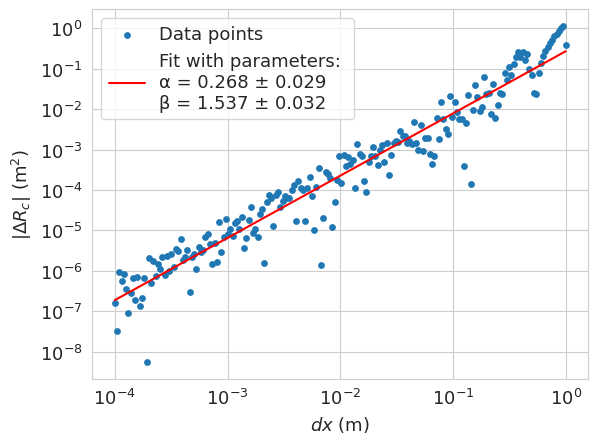

In [104]:
def anal_c(v, bodyvel, l1, l2, rad):
    # Vector subtraction to get the axis
    axis = np.array(l1) - np.array(l2)

    # Adjusting the axis based on v
    axis -= np.dot(v, axis) * np.array(v) / np.dot(v, v)

    # Calculating the norm of the axis
    L = np.linalg.norm(axis)

    # Computing the surface
    surface = np.pi * rad ** 2 + L * 2 * rad

    # Returning the final result
    return np.linalg.norm(v) * surface / bodyvel

def max_c( l1, l2, rad):
    # Vector subtraction to get the axis
    axis = np.array(l1) - np.array(l2)

    # Adjusting the axis based on v
    axis -= np.dot([1,0,0], axis) * np.array([1,0,0])

    # Calculating the norm of the axis
    L = np.linalg.norm(axis)

    # Returning the final result
    return np.pi * rad ** 2 + L * 2 * rad

r = 0.3
l1 = np.array( [0.35, 0.35, 0.35])
l2 = np.array( [0.75, 0.75, 0.75])


# Read the data from the file
df = pd.read_csv('../data/Capsule/ErrorC.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Transform the data
df['error'] = np.abs(df['num'] - anal_c(v, bodyvel, l1, l2, r))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])


# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_c|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/capsule_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_7324/1101500051.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


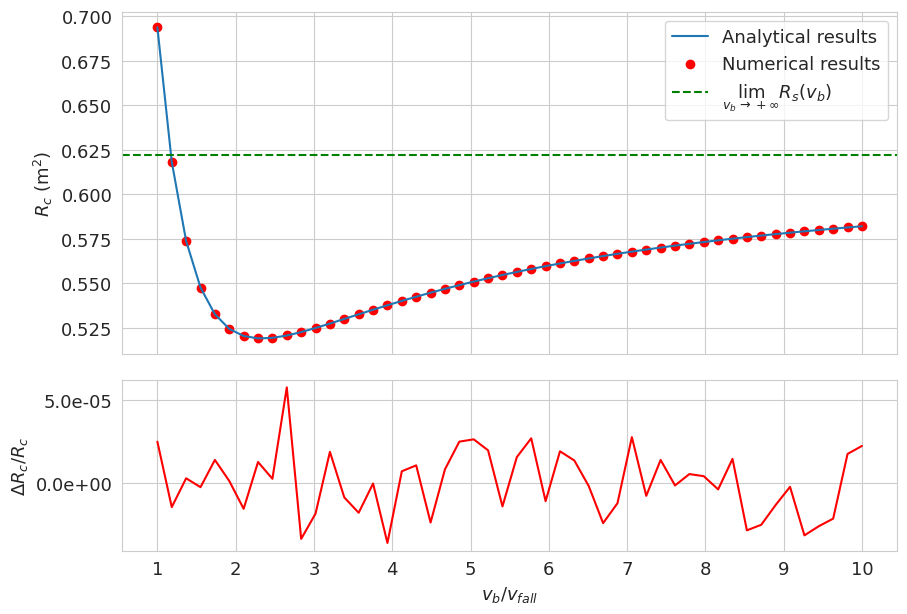

In [105]:
# Read the data from the file
with open("../data/Capsule/CompareC.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Calculate the difference between Y1 and Y2
difference = [(y2 - y1) / y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.1)  # Reduced spacing

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the x-axis with ax1

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytical results')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_c(l1, l2, r), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green', linestyle='dashed')  
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylabel(r'$R_c$ (m$^2$)')
ax1.grid(True)
ax1.legend()



# Apply the custom formatter to the y-axes
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))


# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b/v_{fall}$')
ax2.set_ylabel(r'$\Delta R_c/R_c$')
ax2.grid(True)

# Hide x-labels and tick labels for top plots and y-tick labels for right plots
plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/capsule_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Double Parallelepiped

/tmp/ipykernel_7324/3980911411.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('../data/Pippo/DoubleP.dat', sep=' ', header=None, names=['dist', 'R'], index_col=False)


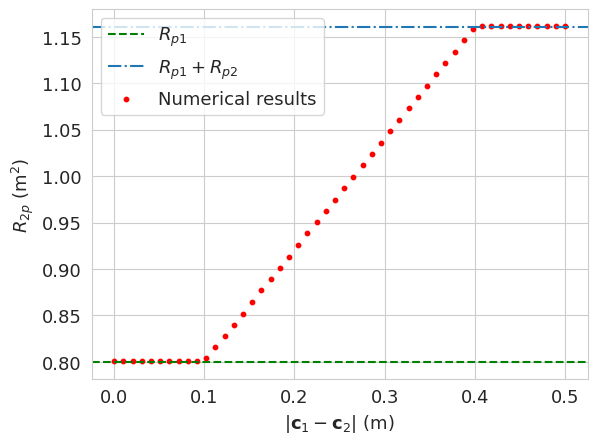

In [106]:
# Read the data from the file
df = pd.read_csv('../data/Pippo/DoubleP.dat', sep=' ', header=None, names=['dist', 'R'], index_col=False)

# Plot min and max
s1 = anal_p(v=[-1, 0, 1], bodyvel=1, side= [ [0.8, 0, 0], [0, 0.5, 0], [0, 0, 0.8]])
s2 = anal_p(v=[-1, 0, 1], bodyvel=1, side= [ [0.6, 0, 0], [0, 0.3, 0], [0, 0, 0.6]])
plt.axhline(y=s1, label=r'$R_{p1}$', color='green', linestyle='dashed')  
plt.axhline(y=s1+s2, label=r'$R_{p1} +R_{p2}$', linestyle='dashdot')  
# Plot the fitted curve
plt.scatter(df['dist'], df['R'], label="Numerical results", s=10, color='red')

plt.xlabel(r'$|\mathbf{c}_1 - \mathbf{c}_2|$ (m)')
plt.ylabel(r'$R_{2p}$ (m$^2$)')



plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/2pippo_wet.png', dpi=300, bbox_inches='tight')

## Results

### Error Analysis

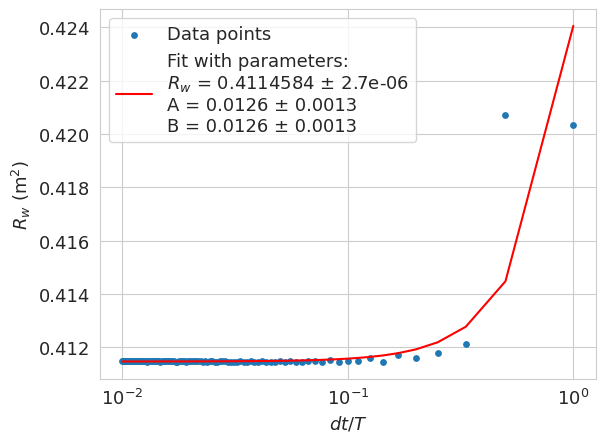

In [150]:
# Read the data from the file
df = pd.read_csv('../data/Walk/ErrT.dat', sep=' ', header=None, names=['nstep', 'num'], index_col=False)



# Transform the data
df['dt'] = 1/( df['nstep'])

# Function to model (log-log power law)
def power_law(x, R, A, B):
    return R + A*(x**B)

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dt'], df['num'], sigma = df['dt'])

# Generate fitted values
fitted_error = power_law(df['dt'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 13})

# Plotting the data
plt.scatter(df['dt'], df['num'], label='Data points', s=15)  
plt.xlabel(r'$dt/T$')
plt.ylabel(r'$R_w$ (m$^2$)') 

# Plot the fitted curve
plt.plot(df['dt'], fitted_error, color='red', label=f"Fit with parameters: \n$R_w$ = {round(params[0],7)} ± {round(standard_errors[0], 7)}\nA = {round(params[1], 4)} ± {round(standard_errors[1], 4)}\nB = {round(params[1], 4)} ± {round(standard_errors[1], 4)}")

# Settings
plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/walk_num_dt_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_7324/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


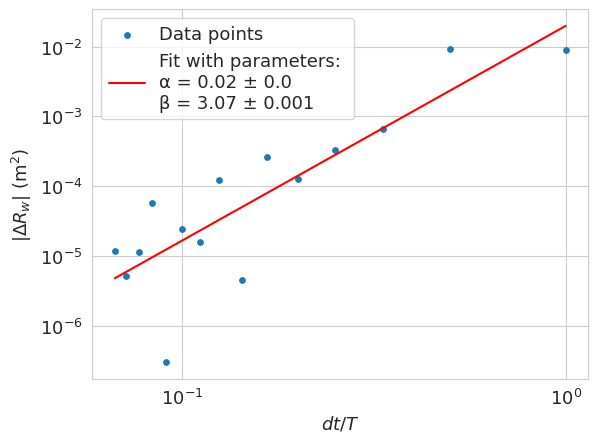

In [151]:
# Transform the data
df = df.head(15)
df['error'] = np.abs(df['num'] - params[0])
df['log_dt'] = np.log( df['dt'])
df['log_error'] = np.log( df['error'])


# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dt'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dt'], *params))

# Plotting the data
plt.scatter(df['dt'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dt/T$')
plt.ylabel(r'$|\Delta R_w|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dt'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/walk_err_dt_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

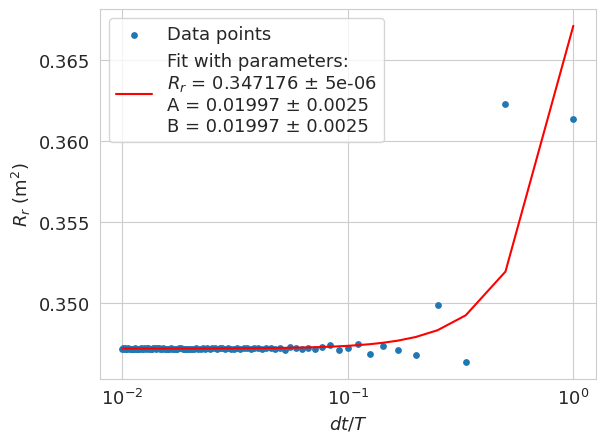

In [152]:
# Read the data from the file
df = pd.read_csv('../data/Run/ErrT.dat', sep=' ', header=None, names=['nstep', 'num'], index_col=False)



# Transform the data
df['dt'] = 1/( df['nstep'])

# Function to model (log-log power law)
def power_law(x, R, A, B):
    return R + A*(x**B)

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dt'], df['num'], sigma = df['dt'])

# Generate fitted values
fitted_error = power_law(df['dt'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 13})

# Plotting the data
plt.scatter(df['dt'], df['num'], label='Data points', s=15)  
plt.xlabel(r'$dt/T$')
plt.ylabel(r'$R_r$ (m$^2$)') 

# Plot the fitted curve
plt.plot(df['dt'], fitted_error, color='red', label=f"Fit with parameters: \n$R_r$ = {round(params[0],6)} ± {round(standard_errors[0], 6)}\nA = {round(params[1], 5)} ± {round(standard_errors[1], 5)}\nB = {round(params[1], 5)} ± {round(standard_errors[1], 5)}")

# Settings
plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/run_num_dt_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_7324/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


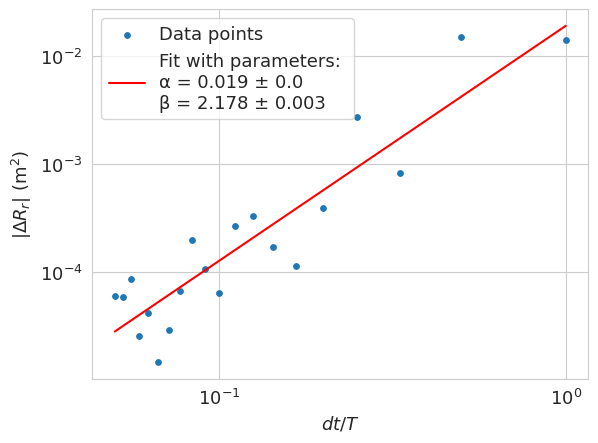

In [153]:
# Transform the data
df = df.head(20)
df['error'] = np.abs(df['num'] - params[0])
df['log_dt'] = np.log( df['dt'])
df['log_error'] = np.log( df['error'])


# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dt'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dt'], *params))

# Plotting the data
plt.scatter(df['dt'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dt/T$')
plt.ylabel(r'$|\Delta R_r|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dt'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/run_err_dt_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

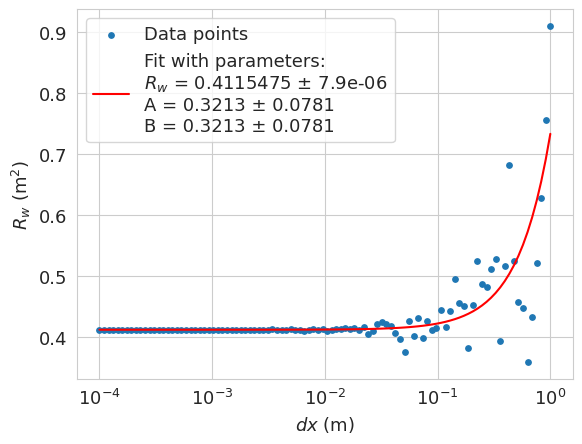

In [159]:
# Read the data from the file
df = pd.read_csv('../data/Walk/ErrDx.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)



# Function to model (log-log power law)
def power_law(x, R, A, B):
    return R + A*(x**B)

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dx'], df['num'], sigma = df['dx'])

# Generate fitted values
fitted_error = power_law(df['dx'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 13})

# Plotting the data
plt.scatter(df['dx'], df['num'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$R_w$ (m$^2$)') 

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \n$R_w$ = {round(params[0],7)} ± {round(standard_errors[0], 7)}\nA = {round(params[1], 4)} ± {round(standard_errors[1], 4)}\nB = {round(params[1], 4)} ± {round(standard_errors[1], 4)}")

# Settings
plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/walk_num_dx_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_7324/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


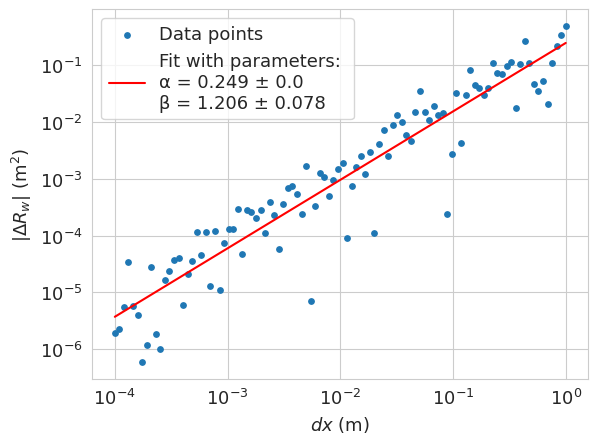

In [160]:
# Transform the data
# df = df.head(20)
df['error'] = np.abs(df['num'] - params[0])
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])


# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_w|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/walk_err_dx_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

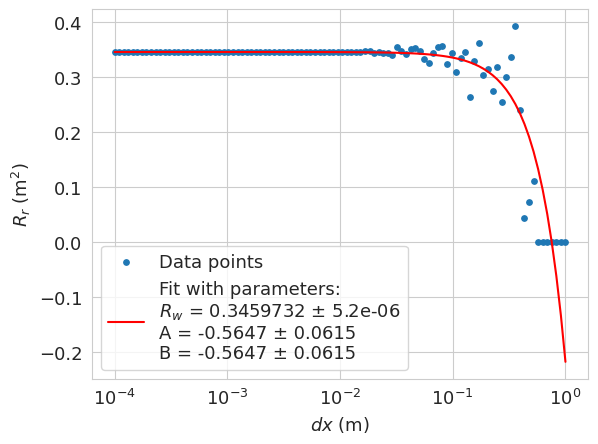

In [161]:
# Read the data from the file
df = pd.read_csv('../data/Run/ErrDx.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)



# Function to model (log-log power law)
def power_law(x, R, A, B):
    return R + A*(x**B)

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dx'], df['num'], sigma = df['dx'])

# Generate fitted values
fitted_error = power_law(df['dx'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 13})

# Plotting the data
plt.scatter(df['dx'], df['num'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$R_r$ (m$^2$)') 

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \n$R_w$ = {round(params[0],7)} ± {round(standard_errors[0], 7)}\nA = {round(params[1], 4)} ± {round(standard_errors[1], 4)}\nB = {round(params[1], 4)} ± {round(standard_errors[1], 4)}")

# Settings
plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/run_num_dx_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_7324/922535931.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


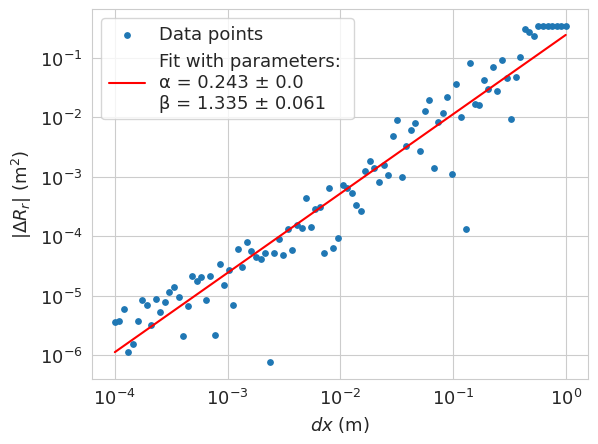

In [162]:
# Transform the data
# df = df.head(20)
df['error'] = np.abs(df['num'] - params[0])
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])


# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_r|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/run_err_dx_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## Printing Shadows

In [111]:
# # Declare functions to print shadows
# def GraphShadow( infile ):
#     plt.figure()
#     DF = pd.read_csv(infile, sep=',', header=None, names=['x', 'y'], index_col=False)
#     plt.scatter(DF['x'], DF['y'], s=0.1, color='black')
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.axis('off')
#     plt.grid(False)
#     plt.show()

# def GraphShadowPrint( infile, outfile ):
#     plt.figure()
#     DF = pd.read_csv(infile, sep=',', header=None, names=['x', 'y'], index_col=False)
#     plt.scatter(DF['x'], DF['y'], s=0.1, color='black')
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.grid(False)
#     plt.axis('off')
#     plt.savefig(outfile,bbox_inches='tight',pad_inches = 0, dpi = 300)
#     plt.close()


# GraphShadowPrint('../data/Walk/Proj/Walk_xy0.000000.dat', 'WalkFrames/Walk_xy0.000000.png')

In [112]:
# # Define the start, end, and step values
# start = 0.000000
# end = 0.983333
# step = 0.01666666666

# # Iterate over the range and call GraphShadowPrint for each file
# while start <= end:
#     print(start)
#     infile = f'../data/Walk/Proj/Walk_xy{start:.6f}.dat'
#     outfile = f'WalkFrames/Walk_xy{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Walk/Proj/Walk_xz{start:.6f}.dat'
#     outfile = f'WalkFrames/Walk_xz{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Walk/Proj/Walk_yz{start:.6f}.dat'
#     outfile = f'WalkFrames/Walk_yz{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Run/Proj/Run_xy{start:.6f}.dat'
#     outfile = f'RunFrames/Run_xy{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Run/Proj/Run_xz{start:.6f}.dat'
#     outfile = f'RunFrames/Run_xz{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Run/Proj/Run_yz{start:.6f}.dat'
#     outfile = f'RunFrames/Run_yz{start:.6f}.png'
#     GraphShadowPrint(infile, outfile)
#     start += step